### One time package installations

In [1]:
#!sudo apt-get update
#!sudo apt-get -y install libzbar0
#!pip install pyzbar
#!pip install opencv-python

In [2]:
import pyzbar.pyzbar as pyzbar
from pyzbar.pyzbar import ZBarSymbol
import numpy as np
import cv2

%matplotlib inline
from matplotlib import pyplot as plt


### Set img_file_path and use Run -> Run Selected Cell and All Below

In [3]:
img_file_path = '../IMAGES/Set1/1.jpg'

In [4]:
# Read image and convert to grayscale for better detection

image = cv2.imread(img_file_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Blur for better detection ? Often making it worse
# blur = cv2.GaussianBlur(gray, (5, 5), 0)
# ret, gray = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Rotate (for reference only)
#gray = cv2.rotate(gray, cv2.cv2.ROTATE_90_CLOCKWISE)


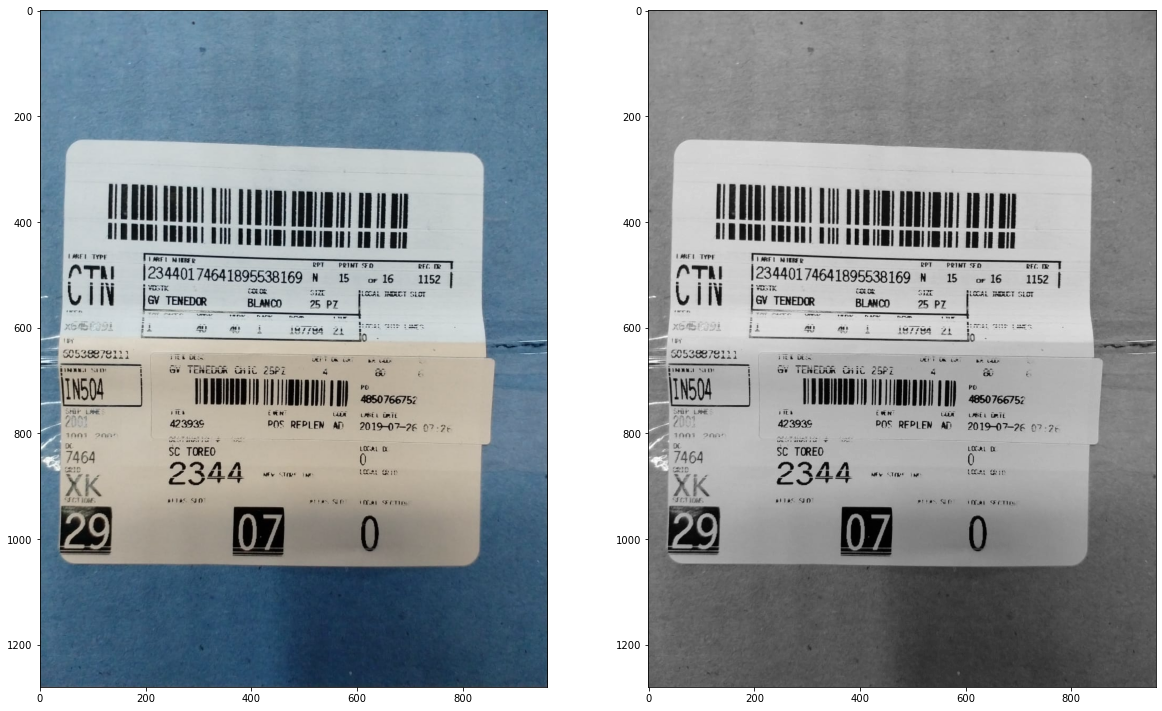

In [5]:
fig, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(image)
ax[1].imshow(gray_image, cmap="gray")

### Main Processing

In [6]:
gray2col_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR) # Convert to colored to allow coloured bounding polygon to be displayed

# Decode
barcodes = pyzbar.decode(gray_image)

# Print results
for i, barcode in enumerate(barcodes):
    decoded_value = barcode.data.decode('utf-8')
    print(f"No: {i+1}, Type: {barcode.type}, Data: {decoded_value}")
    
    # Draw bounds and label results
    points = np.array([barcode.polygon], np.int32)
    points = points.reshape(-1,1,2)
    cv2.polylines(gray2col_image, [points], True, (255,0,255), 10)
    cv2.putText(gray2col_image, f"{decoded_value}", barcode.polygon[0], cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (255,255,255), 2)


No: 1, Type: CODE128, Data: 60538878111
No: 2, Type: CODE128, Data: 23440174641895538169


### Display Boxes

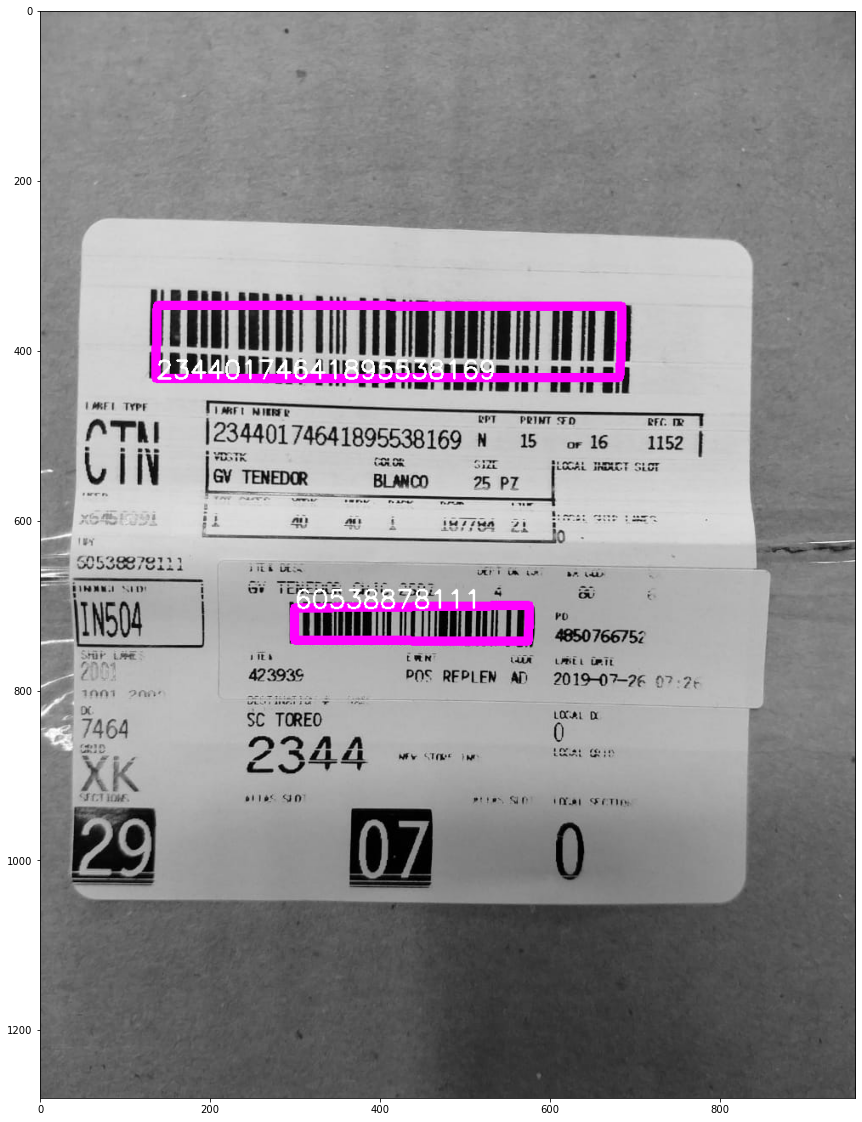

In [7]:
plt.figure(figsize = (20,20))

plt.imshow(gray2col_image)